# Time LLM
## small, 15%, 15%

### torch.cuda.OutOfMemoryError: CUDA out of memory. Tried to allocate 382.00 MiB. GPU 0 has a total capacity of 31.73 GiB of which 610.88 MiB is free. Process 42461 has 2.24 GiB memory in use. Process 20767 has 1.78 GiB memory in use. Process 10768 has 2.56 GiB memory in use. Process 42631 has 13.69 GiB memory in use. Process 47813 has 7.21 GiB memory in use. Including non-PyTorch memory, this process has 3.63 GiB memory in use. Of the allocated memory 2.62 GiB is allocated by PyTorch, and 338.36 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)


In [14]:
import torch

# Get the number of available CUDA devices
num_devices = torch.cuda.device_count()

# Loop through each device and print its name
for i in range(num_devices):
    print(f"Device {i}: {torch.cuda.get_device_name(i)}")


Device 0: Tesla V100-PCIE-32GB
Device 1: Tesla V100-PCIE-32GB
Device 2: Quadro RTX 6000


In [15]:
import time
start = time.time()

train_epochs=1
learning_rate=0.001
llama_layers=6

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

os.environ["CUDA_VISIBLE_DEVICES"] = "1"


!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id 1 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 96 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 7 \
  --dec_in 7 \
  --c_out 7 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
train 90363
val 19443
test 19371
[2024-05-03 15:31:27,516] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-03 15:31:28,873] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-03 15:31:28,873] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-03 15:31:28,873] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-03 15:31:29,768] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_rank=0, world_size=1, master_addr=141.20.21.164, master_port=29500
[2024-05-03 15:31:29,769] [

# Learning Rate 0.1 and COS

In [9]:
import time
start = time.time()

train_epochs=1
learning_rate=0.1
llama_layers=6

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

os.environ["CUDA_VISIBLE_DEVICES"] = "1"


!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id 1 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 96 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --lradj 'COS' \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
train 90363
val 19443
test 19371
d_llm 768
[2024-05-04 00:55:33,780] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-04 00:55:34,706] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-04 00:55:34,706] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-04 00:55:34,706] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-04 00:55:35,629] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_rank=0, world_size=1, master_addr=141.20.21.44, master_port=29500
[2024-05-04 00:55:

In [5]:
!nvidia-smi

Mon May  6 16:00:53 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.67                 Driver Version: 550.67         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla V100-PCIE-32GB           Off |   00000000:3B:00.0 Off |                    0 |
| N/A   30C    P0             36W /  250W |    6770MiB /  32768MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [6]:
import time
import os
start = time.time()

train_epochs=1
learning_rate=0.1
llama_layers=6

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

os.environ["CUDA_VISIBLE_DEVICES"] = "0"


!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id 1 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
train 89115
val 19443
test 19371
d_llm 768
learning_rate 0.1
lr 0.1
[2024-05-06 16:01:07,517] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-06 16:01:08,061] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-06 16:01:08,061] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-06 16:01:08,061] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-06 16:01:08,836] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_rank=0, world_size=1, master_addr=141.20.21.164, master_por

# print / debug learning rate

In [11]:
import time
import os
start = time.time()

train_epochs=1
learning_rate=0.1
llama_layers=6

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

os.environ["CUDA_VISIBLE_DEVICES"] = "0"


!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id 1 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
train 89115
val 19443
test 19371
d_llm 768
learning_rate 0.1
lr 0.1
[2024-05-06 16:08:14,219] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-06 16:08:14,591] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-06 16:08:14,591] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-06 16:08:14,591] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-06 16:08:15,343] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_rank=0, world_size=1, master_addr=141.20.21.164, master_por

# more epochs

In [13]:
import time
import os
start = time.time()

train_epochs=10
learning_rate=0.1
llama_layers=6

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

os.environ["CUDA_VISIBLE_DEVICES"] = "0"


!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id 1 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
train 89115
val 19443
test 19371
d_llm 768
[2024-05-06 16:23:21,025] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-06 16:23:21,834] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-06 16:23:21,834] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-06 16:23:21,834] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-06 16:23:22,650] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_rank=0, world_size=1, master_addr=141.20.21.164, master_port=29500
[2024-05-06 16:23

# COS, 0.01

In [10]:
import time
start = time.time()

train_epochs=1
learning_rate=0.01
llama_layers=6

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

os.environ["CUDA_VISIBLE_DEVICES"] = "1"


!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id 1 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 96 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --lradj 'COS' \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
train 90363
val 19443
test 19371
d_llm 768
[2024-05-04 01:00:42,930] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-04 01:00:43,947] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-04 01:00:43,947] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-04 01:00:43,947] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-04 01:00:44,862] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_rank=0, world_size=1, master_addr=141.20.21.44, master_port=29500
[2024-05-04 01:00:

# 0.001 LR, COS

In [11]:
import time
start = time.time()

train_epochs=1
learning_rate=0.001
llama_layers=6

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

os.environ["CUDA_VISIBLE_DEVICES"] = "1"


!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id 1 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 96 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --lradj 'COS' \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
train 90363
val 19443
test 19371
d_llm 768
[2024-05-04 01:05:42,797] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-04 01:05:43,797] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-04 01:05:43,797] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-04 01:05:43,797] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-04 01:05:44,691] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_rank=0, world_size=1, master_addr=141.20.21.44, master_port=29500
[2024-05-04 01:05:

# 04.05.2024, START FROM HERE:
# 0.001, COS, 10 epochs

In [12]:
import time
start = time.time()

train_epochs=10
learning_rate=0.001
llama_layers=6

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

os.environ["CUDA_VISIBLE_DEVICES"] = "1"


!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id 1 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 96 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --lradj 'COS' \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
train 90363
val 19443
test 19371
d_llm 768
[2024-05-04 01:12:44,664] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-04 01:12:45,708] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-04 01:12:45,709] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-04 01:12:45,709] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-04 01:12:46,639] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_rank=0, world_size=1, master_addr=141.20.21.44, master_port=29500
[2024-05-04 01:12:

# Same but medium

In [13]:
import time
start = time.time()

train_epochs=10
learning_rate=0.001
llama_layers=24

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

os.environ["CUDA_VISIBLE_DEVICES"] = "1"


!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id 1 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 96 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2-medium" \
  --lradj 'COS' \
  --llm_dim 1024 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
train 90363
val 19443
test 19371
d_llm 1024
[2024-05-04 01:48:31,993] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-04 01:48:32,846] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-04 01:48:32,846] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-04 01:48:32,846] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-04 01:48:33,757] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_rank=0, world_size=1, master_addr=141.20.21.44, master_port=29500
[2024-05-04 01:48

# Input 512, medium, COS, lr 0.001

In [14]:
import time
start = time.time()

train_epochs=10
learning_rate=0.001
llama_layers=24

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

os.environ["CUDA_VISIBLE_DEVICES"] = "1"


!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id 1 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2-medium" \
  --lradj 'COS' \
  --llm_dim 1024 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
train 89115
val 19443
test 19371
d_llm 1024
[2024-05-04 03:08:19,084] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-04 03:08:19,915] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-04 03:08:19,915] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-04 03:08:19,916] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-04 03:08:20,800] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_rank=0, world_size=1, master_addr=141.20.21.44, master_port=29500
[2024-05-04 03:08

# 20 epochs

In [16]:
import time
start = time.time()

train_epochs=20
learning_rate=0.001
llama_layers=24

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

os.environ["CUDA_VISIBLE_DEVICES"] = "1"


!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id 1 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2-medium" \
  --lradj 'COS' \
  --llm_dim 1024 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
train 89115
val 19443
test 19371
d_llm 1024
[2024-05-04 16:16:17,335] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-04 16:16:18,175] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-04 16:16:18,175] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-04 16:16:18,175] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-04 16:16:19,121] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_rank=0, world_size=1, master_addr=141.20.21.44, master_port=29500
[2024-05-04 16:16

# small, 20 epochs

In [18]:
import time
start = time.time()

train_epochs=20
learning_rate=0.001
llama_layers=12

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

os.environ["CUDA_VISIBLE_DEVICES"] = "1"


!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id 1 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --lradj 'COS' \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
train 89115
val 19443
test 19371
d_llm 768
[2024-05-04 20:07:53,719] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-04 20:07:54,569] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-04 20:07:54,569] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-04 20:07:54,569] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-04 20:07:55,484] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_rank=0, world_size=1, master_addr=141.20.21.44, master_port=29500
[2024-05-04 20:07:

In [16]:
import time
start = time.time()

train_epochs=1
learning_rate=0.001
llama_layers=12

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

os.environ["CUDA_VISIBLE_DEVICES"] = "1"


!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id 1 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 96 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 7 \
  --dec_in 7 \
  --c_out 7 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
train 90363
val 19443
test 19371
[2024-05-03 15:44:30,610] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-03 15:44:31,493] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-03 15:44:31,493] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-03 15:44:31,493] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-03 15:44:32,485] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_rank=0, world_size=1, master_addr=141.20.21.164, master_port=29500
[2024-05-03 15:44:32,486] [

# A100 80GB

In [3]:
import time
import os
start = time.time()

train_epochs=20
learning_rate=0.001
llama_layers=12

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

os.environ["CUDA_VISIBLE_DEVICES"] = "1"


!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id 1 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 96 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
train 90363
val 19443
test 19371
d_llm 768
[2024-05-03 18:41:03,815] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-03 18:41:04,703] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-03 18:41:04,703] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-03 18:41:04,703] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-03 18:41:05,580] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_rank=0, world_size=1, master_addr=141.20.21.44, master_port=29500
[2024-05-03 18:41:

# GPT2-medium

In [ ]:
import time
import os
start = time.time()

train_epochs=20
learning_rate=0.001
llama_layers=24

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

os.environ["CUDA_VISIBLE_DEVICES"] = "1"


!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --num_machines=1 --dynamo_backend "no" --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id 1 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 96 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2-medium" \
  --llm_dim 1024 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

train 90363
val 19443
test 19371
d_llm 1024
[2024-05-03 20:30:22,622] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-03 20:30:23,465] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-03 20:30:23,466] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-03 20:30:23,466] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-03 20:30:24,380] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_rank=0, world_size=1, master_addr=141.20.21.44, master_port=29500
[2024-05-03 20:30:24,380] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
[2024-05-03 20:30:25,635] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed Flops Profiler Enabled: False
[2024-05-03 20:30:25,636] [INFO] [logging.py:96:log_dist] [Rank 0] Using clie

# 512

In [7]:
import time
import os
start = time.time()

train_epochs=20
learning_rate=0.001
llama_layers=24

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

os.environ["CUDA_VISIBLE_DEVICES"] = "1"


!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --num_machines=1 --dynamo_backend "no" --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id 1 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2-medium" \
  --llm_dim 1024 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

train 89115
val 19443
test 19371
d_llm 1024
[2024-05-03 23:16:03,402] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-03 23:16:04,246] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-03 23:16:04,246] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-03 23:16:04,246] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-03 23:16:05,159] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_rank=0, world_size=1, master_addr=141.20.21.44, master_port=29500
[2024-05-03 23:16:05,159] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
[2024-05-03 23:16:06,308] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed Flops Profiler Enabled: False
[2024-05-03 23:16:06,309] [INFO] [logging.py:96:log_dist] [Rank 0] Using clie

# learning rate 0.1

In [ ]:
import time
import os
start = time.time()

train_epochs=20
learning_rate=0.001
llama_layers=24

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

os.environ["CUDA_VISIBLE_DEVICES"] = "1"


!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --num_machines=1 --dynamo_backend "no" --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id 1 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2-medium" \
  --llm_dim 1024 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

# 2 devices

In [6]:
import time
import os
start = time.time()

train_epochs=1
learning_rate=0.1
llama_layers=24

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

os.environ["CUDA_VISIBLE_DEVICES"] = "1, 2"


!python -m accelerate.commands.launch --multi_gpu --mixed_precision bf16 --num_processes=2 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id 1 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 96 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 7 \
  --dec_in 7 \
  --c_out 7 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
[2024-05-03 23:11:43,907] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-03 23:11:43,917] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-03 23:11:44,837] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-03 23:11:44,837] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-03 23:11:44,837] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
train 90363
val 19443
test 19371
train 90363
val 19443
test 19371
d_llm 768
[2024-05-03 23:11:46,684] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=u

In [3]:
!type python

python ist /vol/cs-hu/riabchuv/.conda/envs/val/bin/python


In [6]:
import time
import os
start = time.time()

train_epochs=1
learning_rate=0.001
llama_layers=32

# num_process=1
batch_size=3
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

os.environ["CUDA_VISIBLE_DEVICES"] = "0"


!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id 1 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "LLAMA" \
  --llm_dim 4096 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
train 89115
val 19443
test 19371
Loading checkpoint shards: 100%|██████████████████| 2/2 [00:08<00:00,  4.27s/it]
d_llm 4096
[2024-05-05 14:44:49,542] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-05 14:44:50,436] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-05 14:44:50,436] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-05 14:44:50,436] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-05 14:44:51,504] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_ra

# LLAMA Gradient Accumulation

In [39]:
!nvidia-smi

Mon May  6 01:36:58 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.67                 Driver Version: 550.67         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100 80GB PCIe          Off |   00000000:3B:00.0 Off |                    0 |
| N/A   30C    P0             62W /  300W |     842MiB /  81920MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [18]:
import time
import os
start = time.time()

train_epochs=1
learning_rate=0.001
llama_layers=32

# num_process=1
batch_size=3
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

os.environ["CUDA_VISIBLE_DEVICES"] = "0"


!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id 1 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "LLAMA" \
  --llm_dim 4096 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
train 89115
val 19443
test 19371
Loading checkpoint shards: 100%|██████████████████| 2/2 [00:06<00:00,  3.12s/it]
d_llm 4096
[2024-05-05 16:49:07,269] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-05 16:49:08,118] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-05 16:49:08,118] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-05 16:49:08,118] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-05 16:49:09,056] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_ra

# Multi-GPU

In [22]:
import time
import os
start = time.time()

train_epochs=1
learning_rate=0.001
llama_layers=32

# num_process=1
batch_size=3
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

os.environ["CUDA_VISIBLE_DEVICES"] = "0, 1"


!python -m accelerate.commands.launch --multi_gpu --mixed_precision bf16 --num_processes=2 --num_machines 1 --dynamo_backend "no" --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id 1 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "LLAMA" \
  --llm_dim 4096 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_machines` was set to a value of `1`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
[2024-05-05 20:36:00,798] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-05 20:36:00,828] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-05 20:36:01,772] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-05 20:36:01,772] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-05 20:36:01,772] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
train 89115
val 19443
test 19371
train 89115
val 19443
test 19371
Loading checkpoint shards: 100%|██████████████████| 2/2 [00:06<00:00,  3.35s/it]
d_llm 4096
[2024-05-05 20:36:44,407] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed info: version=0.14.

In [31]:
import time
import os
start = time.time()

train_epochs=1
learning_rate=0.001
llama_layers=32

# num_process=1
batch_size=3
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

os.environ["CUDA_VISIBLE_DEVICES"] = "0"


!python -m accelerate.commands.launch  --mixed_precision bf16 --num_processes=1 --num_machines 1 --dynamo_backend "no" --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id 1 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "LLAMA" \
  --llm_dim 4096 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

train 89115
val 19443
test 19371
Loading checkpoint shards: 100%|██████████████████| 2/2 [00:06<00:00,  3.16s/it]
d_llm 4096
[2024-05-05 22:20:32,512] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-05 22:20:33,346] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-05 22:20:33,346] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-05 22:20:33,346] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-05 22:20:34,324] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_rank=0, world_size=1, master_addr=141.20.21.44, master_port=29500
[2024-05-05 22:20:34,324] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
[2024-05-05 22:20:46,913] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed Flops Profiler Enabled: Fa

# LLAMA 7b with Gradient accumulation with Accelerate

In [40]:
import time
import os
start = time.time()

train_epochs=20
learning_rate=0.001
llama_layers=32

# num_process=1
batch_size=3
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

os.environ["CUDA_VISIBLE_DEVICES"] = "0"


!python -m accelerate.commands.launch  --mixed_precision bf16 --num_processes=1 --num_machines 1 --dynamo_backend "no" --main_process_port "01025" ./Time-LLM/run_main_copy.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id 1 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "LLAMA" \
  --llm_dim 4096 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

train 89115
val 19443
test 19371
Loading checkpoint shards: 100%|██████████████████| 2/2 [00:07<00:00,  3.59s/it]
d_llm 4096
[2024-05-06 01:38:09,462] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-06 01:38:10,171] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-06 01:38:10,172] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-06 01:38:10,172] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-06 01:38:11,083] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_rank=0, world_size=1, master_addr=141.20.21.44, master_port=29500
[2024-05-06 01:38:11,083] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
[2024-05-06 01:38:23,873] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed Flops Profiler Enabled: Fa

In [13]:
import time
import os
start = time.time()

train_epochs=20
learning_rate=0.001
llama_layers=32

# num_process=1
batch_size=3
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

os.environ["CUDA_VISIBLE_DEVICES"] = "0"


!python -m accelerate.commands.launch  --mixed_precision bf16 --num_processes=1 --num_machines 1 --dynamo_backend "no" --main_process_port "01025" ./Time-LLM/run_main_copy.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id 1 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --lradj 'COS' \
  --llm_model "LLAMA" \
  --llm_dim 4096 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

: 

In [5]:
24*5

120

In [8]:
import time
import os
start = time.time()

train_epochs=20
learning_rate=0.001
llama_layers=32

# num_process=1
batch_size=3
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

os.environ["CUDA_VISIBLE_DEVICES"] = "0"


!python -m accelerate.commands.launch  --mixed_precision bf16 --num_processes=1 --num_machines 1 --dynamo_backend "no" --main_process_port "01025" ./Time-LLM/run_main_copy.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id 1 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --lradj 'COS' \
  --llm_model "LLAMA" \
  --llm_dim 4096 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

train 89115
val 19443
test 19371
Loading checkpoint shards: 100%|██████████████████| 2/2 [00:05<00:00,  2.87s/it]
d_llm 4096
[2024-05-06 17:09:38,263] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-06 17:09:39,079] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-06 17:09:39,079] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-06 17:09:39,079] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-06 17:09:40,012] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_rank=0, world_size=1, master_addr=141.20.21.44, master_port=29500
[2024-05-06 17:09:40,013] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
[2024-05-06 17:09:51,811] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed Flops Profiler Enabled: Fa

In [ ]:
import time
import os
start = time.time()

train_epochs=20
learning_rate=0.001
llama_layers=32

# num_process=1
batch_size=3
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

os.environ["CUDA_VISIBLE_DEVICES"] = "0"


!python -m accelerate.commands.launch  --mixed_precision bf16 --num_processes=1 --num_machines 1 --dynamo_backend "no" --main_process_port "01025" ./Time-LLM/run_main_copy.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id 1 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --lradj 'constant' \
  --llm_model "LLAMA" \
  --llm_dim 4096 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

# Smallest model that gives best performance!

In [9]:
import time
start = time.time()

train_epochs=25
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.001
llama_layers=6 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
train 89115
val 19443
test 19371
d_llm 768
[2024-05-06 22:10:59,618] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-06 22:11:00,506] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-06 22:11:00,506] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-06 22:11:00,507] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-06 22:11:01,451] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_rank=0, world_size=1, master_addr=141.20.21.44, master_port=29500
[2024-05-06 22:11:

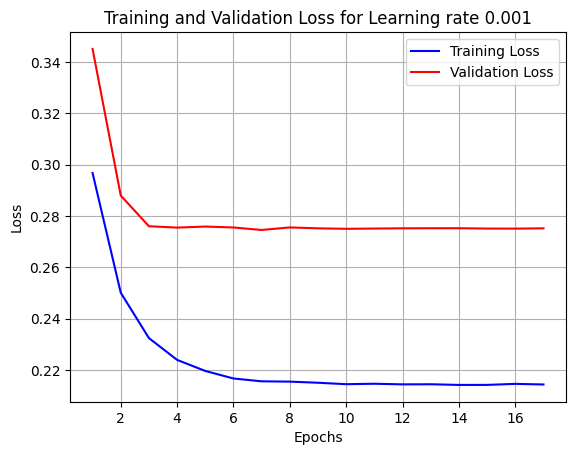

In [16]:
vali_loss = [0.3450846, 0.2879424, 0.2759690, 0.2754466, 0.2758530, 0.2754931, 0.2745227, 0.2755143, 0.2751592, 0.2749725, 0.2750762, 0.2751685, 0.2751984, 0.2752024, 0.2750725, 0.2750444, 0.2751632]
tr_loss = [0.2967043, 0.2500637, 0.2323816, 0.2238862, 0.2195765, 0.2166366, 0.2155371, 0.2154173, 0.2149778, 0.2144178, 0.2145903, 0.2143507, 0.2143879, 0.2141329, 0.2141449, 0.2145413, 0.2143012]
legend_labels = plot_train_val_loss(tr_loss, vali_loss, 0.001)

# Constant learning rate: Overfitting!
## from 5th epoch
## lr = 0.0001 - too small

In [17]:
import time
start = time.time()

train_epochs=25
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.0001
llama_layers=6 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --lradj 'constant' \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

The following values were not passed to `accelerate launch` and had defaults used instead:
		More than one GPU was found, enabling multi-GPU training.
		If this was unintended please pass in `--num_processes=1`.
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
[2024-05-07 22:54:44,749] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-07 22:54:45,741] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-07 22:54:45,741] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
train 89115
val 19443
test 19371
d_llm 768
[2024-05-07 22:54:47,500] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-07 22:54:48,016] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed Flops Profiler Enable

In [18]:
import time
start = time.time()

train_epochs=25
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.0001
llama_layers=6 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

The following values were not passed to `accelerate launch` and had defaults used instead:
		More than one GPU was found, enabling multi-GPU training.
		If this was unintended please pass in `--num_processes=1`.
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
[2024-05-07 23:31:10,132] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-07 23:31:11,263] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-07 23:31:11,263] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
train 89115
val 19443
test 19371
d_llm 768
[2024-05-07 23:31:13,047] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-07 23:31:13,548] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed Flops Profiler Enable

In [14]:
import time
start = time.time()

train_epochs=25
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.00001
llama_layers=6 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --lradj 'constant' \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
train 89115
val 19443
test 19371
d_llm 768
[2024-05-06 23:55:27,318] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-06 23:55:28,152] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-06 23:55:28,152] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-06 23:55:28,152] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-06 23:55:29,066] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_rank=0, world_size=1, master_addr=141.20.21.44, master_port=29500
[2024-05-06 23:55:

# TODO: Graph

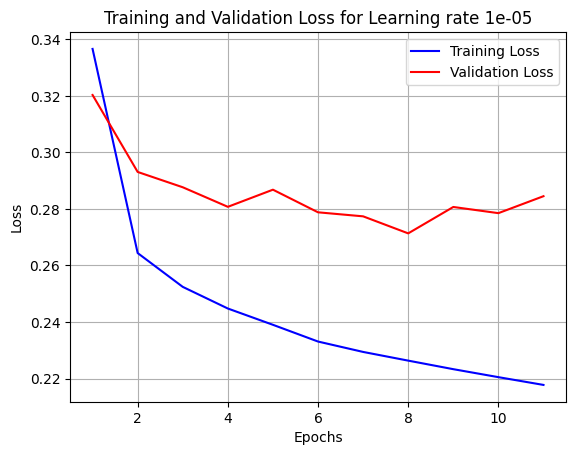

In [15]:
vali_loss = [0.3202976, 0.2930738, 0.2876566, 0.2807395, 0.2868012, 0.2787986, 0.2773737, 0.2713491, 0.2806862, 0.2785022, 0.2844976]
tr_loss = [0.3365891, 0.2643867, 0.2524274, 0.2447699, 0.2390104, 0.2330910, 0.2294159, 0.2263394, 0.2233159, 0.2204941, 0.2177464]
legend_labels = plot_train_val_loss(tr_loss, vali_loss, 0.00001)

# Batch_size

In [1]:
import time
start = time.time()

train_epochs=20
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.001
llama_layers=6 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=256
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

The following values were not passed to `accelerate launch` and had defaults used instead:
		More than one GPU was found, enabling multi-GPU training.
		If this was unintended please pass in `--num_processes=1`.
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
[2024-05-07 01:48:40,406] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-07 01:48:41,623] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-07 01:48:41,624] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
train 89115
val 19443
test 19371
d_llm 768
[2024-05-07 01:48:43,265] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-07 01:48:43,760] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed Flops Profiler Enable

In [2]:
import time
start = time.time()

train_epochs=20
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.001
llama_layers=6 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=128
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

The following values were not passed to `accelerate launch` and had defaults used instead:
		More than one GPU was found, enabling multi-GPU training.
		If this was unintended please pass in `--num_processes=1`.
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
[2024-05-07 02:13:46,353] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-07 02:13:47,322] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-07 02:13:47,322] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
train 89115
val 19443
test 19371
d_llm 768
[2024-05-07 02:13:49,526] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-07 02:13:50,313] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed Flops Profiler Enable

199it [00:44,  5.23it/s]	iters: 200, epoch: 1 | loss: 0.2775090
	speed: 0.2216s/iter; left time: 3040.2054s
299it [01:06,  4.70it/s]	iters: 300, epoch: 1 | loss: 0.3590579
	speed: 0.2193s/iter; left time: 2986.4835s
399it [01:28,  4.28it/s]	iters: 400, epoch: 1 | loss: 0.2895975
	speed: 0.2192s/iter; left time: 2963.7327s
499it [01:50,  4.94it/s]	iters: 500, epoch: 1 | loss: 0.2993958
	speed: 0.2200s/iter; left time: 2951.9997s
599it [02:13,  5.00it/s]	iters: 600, epoch: 1 | loss: 0.2859322
	speed: 0.2265s/iter; left time: 3017.5638s
696it [02:34,  4.52it/s]
Epoch: 1 cost time: 154.00415992736816
151it [00:19,  7.63it/s]
151it [00:19,  7.80it/s]
Epoch: 1 | Train Loss: 0.3591971 Vali Loss: 0.3131735 Test Loss: 0.3844208 MAE Loss: 0.4030330
lr = 0.0000400000
Updating learning rate to 3.9999999999999996e-05
learning_rate 3.9999999999999996e-05
lr 3.9999999999999996e-05
99it [00:19,  4.71it/s]	iters: 100, epoch: 2 | loss: 0.2870230
	speed: 0.8177s/iter; left time: 10732.1881s
199it [00:38,

In [3]:
import time
start = time.time()

train_epochs=20
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.001
llama_layers=6 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=128
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

The following values were not passed to `accelerate launch` and had defaults used instead:
		More than one GPU was found, enabling multi-GPU training.
		If this was unintended please pass in `--num_processes=1`.
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
[2024-05-07 20:03:37,973] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-07 20:03:39,003] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-07 20:03:39,003] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
train 89115
val 19443
test 19371
d_llm 768
[2024-05-07 20:03:40,928] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-07 20:03:41,407] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed Flops Profiler Enable

In [4]:
import time
start = time.time()

train_epochs=20
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.001
llama_layers=6 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size= 16
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

The following values were not passed to `accelerate launch` and had defaults used instead:
		More than one GPU was found, enabling multi-GPU training.
		If this was unintended please pass in `--num_processes=1`.
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
[2024-05-07 02:50:38,738] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-07 02:50:39,666] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-07 02:50:39,666] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
train 89115
val 19443
test 19371
d_llm 768
[2024-05-07 02:50:41,997] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-07 02:50:42,588] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed Flops Profiler Enable

In [5]:
import time
start = time.time()

train_epochs=20
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.001
llama_layers=6 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 96 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

The following values were not passed to `accelerate launch` and had defaults used instead:
		More than one GPU was found, enabling multi-GPU training.
		If this was unintended please pass in `--num_processes=1`.
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
[2024-05-07 03:54:35,500] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-07 03:54:36,665] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-07 03:54:36,665] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
train 88899
val 19227
test 19155
d_llm 768
[2024-05-07 03:54:38,266] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-07 03:54:38,743] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed Flops Profiler Enable

In [6]:
import time
start = time.time()

train_epochs=20
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.001
llama_layers=12 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=256
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

The following values were not passed to `accelerate launch` and had defaults used instead:
		More than one GPU was found, enabling multi-GPU training.
		If this was unintended please pass in `--num_processes=1`.
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
[2024-05-07 04:13:31,024] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-07 04:13:32,051] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-07 04:13:32,052] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
train 89115
val 19443
test 19371
d_llm 768
[2024-05-07 04:13:34,157] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-07 04:13:34,760] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed Flops Profiler Enable

In [7]:
import time
start = time.time()

train_epochs=20
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.001
llama_layers=12 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=256
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2-medium" \
  --llm_dim 1024 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

The following values were not passed to `accelerate launch` and had defaults used instead:
		More than one GPU was found, enabling multi-GPU training.
		If this was unintended please pass in `--num_processes=1`.
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
[2024-05-07 05:04:28,993] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-07 05:04:30,308] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-07 05:04:30,308] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
train 89115
val 19443
test 19371
d_llm 1024
[2024-05-07 05:04:33,757] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-07 05:04:34,765] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed Flops Profiler Enabl

In [8]:
import time
start = time.time()

train_epochs=20
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.001
llama_layers=24 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2-medium" \
  --llm_dim 1024 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

The following values were not passed to `accelerate launch` and had defaults used instead:
		More than one GPU was found, enabling multi-GPU training.
		If this was unintended please pass in `--num_processes=1`.
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
[2024-05-07 05:56:39,031] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-07 05:56:40,083] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-07 05:56:40,083] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
train 89115
val 19443
test 19371
d_llm 1024
[2024-05-07 05:56:45,271] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-07 05:56:46,189] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed Flops Profiler Enabl

In [7]:
import time
start = time.time()

train_epochs=20
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.001
llama_layers=12 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=256
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main_onecycle_batch.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

The following values were not passed to `accelerate launch` and had defaults used instead:
		More than one GPU was found, enabling multi-GPU training.
		If this was unintended please pass in `--num_processes=1`.
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
[2024-05-07 21:13:47,245] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-07 21:13:47,950] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-07 21:13:47,951] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
train 89115
val 19443
test 19371
d_llm 768
[2024-05-07 21:13:50,105] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-07 21:13:50,667] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed Flops Profiler Enable

In [8]:
import time
start = time.time()

train_epochs=20
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.1
llama_layers=12 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

The following values were not passed to `accelerate launch` and had defaults used instead:
		More than one GPU was found, enabling multi-GPU training.
		If this was unintended please pass in `--num_processes=1`.
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
[2024-05-07 21:30:29,368] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-07 21:30:30,395] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-07 21:30:30,395] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
train 89115
val 19443
test 19371
d_llm 768
[2024-05-07 21:30:32,319] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-07 21:30:32,859] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed Flops Profiler Enable

# Bad, lr 0.01, GPT2 - 12 layers

In [9]:
import time
start = time.time()

train_epochs=20
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.01
llama_layers=12 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

The following values were not passed to `accelerate launch` and had defaults used instead:
		More than one GPU was found, enabling multi-GPU training.
		If this was unintended please pass in `--num_processes=1`.
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
[2024-05-07 21:41:50,720] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-07 21:41:51,932] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-07 21:41:51,932] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
train 89115
val 19443
test 19371
d_llm 768
[2024-05-07 21:41:53,725] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-07 21:41:54,255] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed Flops Profiler Enable

In [16]:
import time
import os
start = time.time()

train_epochs=20
learning_rate=0.001
llama_layers=32

# num_process=1
batch_size=3
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

os.environ["CUDA_VISIBLE_DEVICES"] = "0"


!python -m accelerate.commands.launch  --mixed_precision bf16 --num_processes=1 --num_machines 1 --dynamo_backend "no" --main_process_port "01025" ./Time-LLM/run_main_copy_copy.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id 1 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "LLAMA" \
  --llm_dim 4096 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

train 89115
val 19443
test 19371
Loading checkpoint shards: 100%|██████████████████| 2/2 [00:05<00:00,  2.94s/it]
d_llm 4096
[2024-05-07 01:04:13,384] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-07 01:04:14,225] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-07 01:04:14,225] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-07 01:04:14,226] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-07 01:04:15,198] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_rank=0, world_size=1, master_addr=141.20.21.44, master_port=29500
[2024-05-07 01:04:15,199] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
[2024-05-07 01:04:26,997] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed Flops Profiler Enabled: Fa